In [1]:
import os

In [3]:
data_dir = 'C:\\Users\\suhas maddali\\Desktop\\cell_images'

In [4]:
os.listdir(data_dir)

['test', 'train']

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from matplotlib.image import imread

In [7]:
test_path = data_dir + '\\test\\'
train_path = data_dir + '\\train\\'

In [8]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [9]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [11]:
os.listdir(train_path + 'parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [12]:
para_cell = train_path + 'parasitized\\' + 'C100P61ThinF_IMG_20150918_144104_cell_162.png'

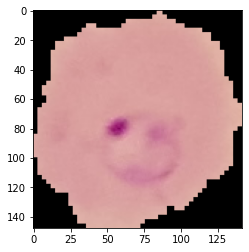

In [15]:
plt.imshow(imread(para_cell))

In [16]:
os.listdir(train_path + 'uninfected')[0]

'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [17]:
uninfected_cell = train_path + 'uninfected\\' + 'C100P61ThinF_IMG_20150918_144104_cell_128.png'

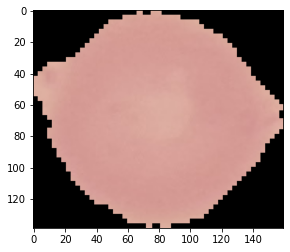

In [18]:
plt.imshow(imread(uninfected_cell))

In [19]:
pwd

'C:\\Users\\suhas maddali\\Desktop'

In [21]:
len(os.listdir(train_path + 'parasitized'))

12480

In [22]:
len(os.listdir(train_path + 'uninfected'))

12480

In [23]:
len(os.listdir(test_path + 'parasitized'))

1300

In [24]:
len(os.listdir(test_path + 'uninfected'))

1300

In [25]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path + 'uninfected'):
    img = imread(test_path + 'uninfected\\' + image_filename)
    d1, d2, colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [27]:
np.mean(dim1)

130.92538461538462

In [28]:
np.mean(dim2)

130.75

In [29]:
image_shape = (130, 130, 3)

In [30]:
130 * 130 * 3

50700

In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [36]:
image_gen = ImageDataGenerator(rotation_range = 20,
                              width_shift_range = 0.1,
                              height_shift_range = 0.1,
                              shear_range = 0.1,
                              zoom_range = 0.1,
                              horizontal_flip = True,
                              fill_mode = 'nearest')

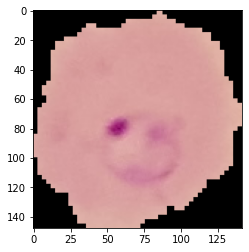

In [37]:
plt.imshow(imread(para_cell))

In [38]:
para_img = imread(para_cell)

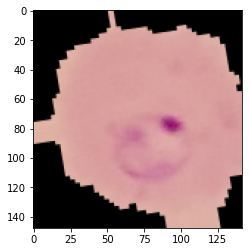

In [40]:
plt.imshow(image_gen.random_transform(para_img))

In [42]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [43]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [44]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [45]:
from tensorflow.keras.models import Sequential

In [50]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten

In [52]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape = image_shape, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), input_shape = image_shape, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), input_shape = image_shape, activation = 'relu'))
model.add(MaxPool2D(pool_size = (2, 2)))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam',
             metrics = 'accuracy')


In [53]:
from tensorflow.keras.callbacks import EarlyStopping

In [55]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 2)

In [56]:
batch_size = 16

In [59]:
train_image_gen = image_gen.flow_from_directory(train_path, target_size = image_shape[0: 2],
                                               color_mode = 'rgb',
                                               batch_size = batch_size,
                                                class_mode = 'binary')

Found 24958 images belonging to 2 classes.


In [62]:
test_image_gen = image_gen.flow_from_directory(test_path, target_size = image_shape[0: 2],
                                               color_mode = 'rgb',
                                               batch_size = batch_size,
                                                class_mode = 'binary',
                                               shuffle = False)

Found 2600 images belonging to 2 classes.


In [63]:
results = model.fit_generator(train_image_gen, epochs = 20, 
                             validation_data = test_image_gen,
                             callbacks = [early_stop])

Epoch 1/20


C:\Anaconda\envs\jose_reinforcement\lib\site-packages\ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


163/163 [==============================] - 39s 238ms/step - loss: 5.2859 - accuracy: 0.4742 - val_loss: 0.6919 - val_accuracy: 0.5231
Epoch 2/20
163/163 [==============================] - 39s 240ms/step - loss: 0.6934 - accuracy: 0.4985 - val_loss: 0.6898 - val_accuracy: 0.5296
Epoch 3/20
163/163 [==============================] - 41s 251ms/step - loss: 0.6988 - accuracy: 0.5023 - val_loss: 0.6877 - val_accuracy: 0.5415
Epoch 4/20
163/163 [==============================] - 40s 245ms/step - loss: 0.7048 - accuracy: 0.5388 - val_loss: 0.6909 - val_accuracy: 0.5200
Epoch 5/20
163/163 [==============================] - 40s 244ms/step - loss: 0.6962 - accuracy: 0.5200 - val_loss: 0.6900 - val_accuracy: 0.5523


In [64]:
from tensorflow.keras.models import load_model

In [65]:
model.metrics_names

['loss', 'accuracy']

In [66]:
model.predict_generator(test_image_gen)

C:\Anaconda\envs\jose_reinforcement\lib\site-packages\ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


array([[0.52242035],
       [0.50358033],
       [0.50723183],
       ...,
       [0.47115234],
       [0.5095539 ],
       [0.50809485]], dtype=float32)

In [67]:
pred = model.predict_generator(test_image_gen)

C:\Anaconda\envs\jose_reinforcement\lib\site-packages\ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [68]:
pred

array([[0.46951416],
       [0.4980897 ],
       [0.45555457],
       ...,
       [0.47492495],
       [0.4918243 ],
       [0.45965475]], dtype=float32)

In [69]:
predictions = pred > 0.5

In [70]:
len(pred)

2600

In [71]:
from sklearn.metrics import classification_report, confusion_matrix

In [72]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [73]:
print(classification_report(test_image_gen.classes, predictions))

              precision    recall  f1-score   support

           0       0.55      0.55      0.55      1300
           1       0.55      0.55      0.55      1300

    accuracy                           0.55      2600
   macro avg       0.55      0.55      0.55      2600
weighted avg       0.55      0.55      0.55      2600



In [74]:
para_cell

'C:\\Users\\suhas maddali\\Desktop\\cell_images\\train\\parasitized\\C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [75]:
from tensorflow.keras.preprocessing import image

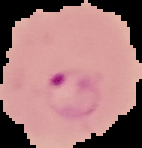

In [76]:
image.load_img(para_cell)

In [80]:
my_image = image.load_img(para_cell, target_size = image_shape)

In [81]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 64)      

In [82]:
image.img_to_array(my_image)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)